In [1]:
# la distinction des groupes de patient qui peuvent contracter la maladie du diabète 

In [2]:
#Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline




In [3]:
from sklearn.cluster import KMeans

In [4]:
#J'importe mon jeu de données.Il s'agit ici d'un jeu de données e-commerce importé depuis mon ordinateur (pas depuis sklearn)
diabete = pd.read_csv (r"C:\Users\ACER\Desktop\diabetes.csv")

In [5]:
#Regardons à quoi ressemble le jeu de données en question.
#Vous remarquerez que des données qualitatives ont été transformées en données quantitatives, par ex: session time of day is PM etc...
#Sachez que cette manipulation est possible et utile mais ca n'est pas qqchose que nous aurons le temps d'étudier en detail.
diabete.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Quelle est la taille du jeu de données?
#Ici, nous avons 200 rangées et 48 colonnes.
diabete.shape

(768, 9)

In [7]:
# le nombre de patient chez qui nous faisons l'étude est de 768

In [8]:
#Ici, je vérifie que je n'ai pas de données manquantes.
diabete.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabete.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
print (diabete.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
diabete.describe()
#Ici, je sors les valeurs clés pour chacune de mes données. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#Ici, je standardise mon jeu de données.
from sklearn.preprocessing import normalize

Xn1 = normalize(diabete)

In [13]:
Xn1 = pd.DataFrame(data=Xn1,columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
Xn1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.033552,0.827612,0.402622,0.195719,0.000000,0.187890,0.003506,0.279599,0.005592
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0.000000
2,0.040397,0.924085,0.323177,0.000000,0.000000,0.117657,0.003393,0.161589,0.005050
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0.000000
4,0.000000,0.596381,0.174126,0.152360,0.731328,0.187620,0.009960,0.143654,0.004353


In [14]:
Xn1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.033552,0.827612,0.402622,0.195719,0.000000,0.187890,0.003506,0.279599,0.005592
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0.000000
2,0.040397,0.924085,0.323177,0.000000,0.000000,0.117657,0.003393,0.161589,0.005050
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0.000000
4,0.000000,0.596381,0.174126,0.152360,0.731328,0.187620,0.009960,0.143654,0.004353


In [15]:
from sklearn.cluster import KMeans

# Ici, je crée 2 Clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(Xn1)

KMeans(n_clusters=2)

In [16]:
# Ici, 4 Clusters
k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(Xn1)

KMeans(n_clusters=4)

In [17]:
# Et ici, 6 Clusters
k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(Xn1)

KMeans(n_clusters=6)

In [18]:
#Ici, je sors la valeur du cluster (0,1) qui a été attribuée à chaque observation/rangée par K-Means.
#J'imprime ensuite les coordonnées de mes 2 centroides.
labels_2 = k_mean2.labels_
print (labels_2)
clusters_2 = k_mean2.cluster_centers_
clusters_2

[1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0
 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 1 1 

array([[0.0154813 , 0.56648638, 0.33954064, 0.14045628, 0.6596112 ,
        0.15976365, 0.00253167, 0.14604219, 0.001395  ],
       [0.02877045, 0.78244114, 0.45688997, 0.08782687, 0.02760513,
        0.21005317, 0.00286265, 0.23766558, 0.00212965]])

In [19]:
#Ici, je sors la valeur du cluster (0,1,2,3) qui a été attribuée à chaque observation/rangée par K-Means.
#J'imprime ensuite les coordonnées de mes 4 centroides.
labels_4 = k_mean4.labels_
print (labels_4)
clusters_4 = k_mean4.cluster_centers_
clusters_4

[2 2 2 0 3 2 0 1 3 2 2 2 2 3 3 1 3 2 0 0 3 2 2 2 0 0 2 3 0 2 2 3 0 2 2 3 2
 2 2 3 0 2 2 3 2 2 2 2 2 1 0 0 2 3 3 2 3 0 2 3 1 2 2 0 2 2 2 2 0 0 0 0 2 3
 2 2 2 2 1 2 2 1 0 2 2 0 2 0 0 2 2 3 0 2 0 3 2 0 0 3 2 2 2 0 2 3 2 0 2 2 0
 3 0 2 3 2 2 2 2 0 0 2 0 2 2 0 0 0 0 2 0 2 3 2 0 3 0 0 2 3 2 2 0 2 3 2 2 0
 2 2 3 2 0 3 2 2 0 3 0 0 2 0 3 2 2 3 2 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 0 2 2
 2 3 0 0 3 2 0 2 1 2 3 2 0 0 3 2 2 2 0 3 2 3 2 0 2 2 2 2 0 3 3 3 0 2 2 3 2
 1 3 0 2 2 2 3 0 2 3 0 2 0 2 3 2 2 2 2 0 2 3 3 2 2 3 3 2 2 2 0 2 3 2 2 2 3
 0 0 1 2 2 2 0 1 2 2 1 2 0 2 0 2 0 2 0 2 3 2 0 0 2 2 0 3 3 0 0 0 0 3 3 1 0
 3 3 3 2 1 0 0 2 2 0 0 3 3 3 2 3 0 0 2 0 0 2 3 2 3 2 2 2 2 3 3 2 0 0 2 0 1
 2 0 3 1 2 3 2 0 0 2 2 2 0 0 1 0 2 2 2 2 0 2 2 3 1 0 3 3 2 2 2 3 0 2 2 0 0
 3 0 0 0 3 3 0 0 2 0 0 2 3 0 0 0 2 2 3 0 3 2 3 0 2 3 0 2 2 2 2 2 0 2 2 3 2
 2 2 3 2 3 3 0 3 3 2 2 2 0 3 0 0 2 3 3 1 3 0 3 1 0 0 2 2 1 2 2 2 2 2 0 0 2
 2 2 0 0 0 0 0 2 3 1 0 2 2 0 3 0 0 2 0 2 2 0 0 0 1 0 2 2 2 2 2 2 3 0 0 2 3
 2 0 3 1 3 3 3 2 2 0 2 2 

array([[0.01859795, 0.65267056, 0.42338055, 0.16544375, 0.51365031,
        0.19009138, 0.00291263, 0.17618515, 0.00118301],
       [0.02860443, 0.93367432, 0.01369608, 0.01688499, 0.00653257,
        0.19625844, 0.00313692, 0.2504699 , 0.00299693],
       [0.02981474, 0.77208895, 0.5003515 , 0.08935463, 0.00466518,
        0.21269469, 0.00282982, 0.2394171 , 0.00217818],
       [0.01135844, 0.47416795, 0.25298306, 0.10952285, 0.8014617 ,
        0.12446422, 0.0020739 , 0.1142537 , 0.00151542]])

In [20]:
#Ici, je sors la valeur du cluster (0,1,2,3,4,5) qui a été attribuée à chaque observation/rangée par K-Means.
#J'imprime ensuite les coordonnées de mes 6 centroides.

labels_6 = k_mean6.labels_
print (labels_6)
clusters_6 = k_mean6.cluster_centers_
clusters_6

[3 3 0 1 1 0 1 4 5 0 0 0 0 5 1 4 5 0 1 1 5 0 0 3 1 1 0 1 1 0 3 5 2 0 3 5 0
 3 3 5 2 0 3 1 0 0 0 3 3 4 2 2 3 5 5 0 5 2 0 1 4 0 3 1 0 3 3 0 2 2 1 1 0 5
 3 3 3 3 4 0 0 4 2 3 0 1 3 2 1 0 0 1 2 0 2 5 3 1 2 5 0 0 0 2 0 1 3 1 3 2 1
 5 2 0 1 0 0 0 3 2 2 3 1 0 0 1 1 1 1 0 1 0 5 3 2 1 2 1 0 5 0 3 2 0 5 3 3 1
 0 3 5 0 1 5 0 3 1 1 2 1 3 1 5 3 0 1 0 0 0 2 0 1 4 2 2 1 0 2 0 0 0 1 2 0 0
 0 5 2 1 1 0 2 0 4 3 1 0 2 1 5 0 0 3 2 5 3 5 0 1 0 3 3 0 1 1 5 1 1 3 0 5 0
 4 1 2 2 0 0 5 2 0 5 2 0 2 0 1 0 0 0 3 1 0 5 1 0 0 5 5 3 0 0 2 3 5 3 3 0 5
 1 1 4 3 0 0 2 4 3 0 4 3 2 0 2 0 2 3 1 0 5 0 1 1 0 0 1 5 5 2 2 2 2 1 5 0 1
 5 5 5 0 4 1 2 0 0 1 1 1 5 5 3 1 2 1 3 1 2 0 1 0 5 3 0 3 3 1 1 0 1 2 0 2 4
 0 2 5 4 0 1 0 1 2 3 0 0 2 1 4 2 3 0 0 3 2 0 0 1 4 2 1 5 0 3 0 5 1 0 0 2 1
 5 1 2 1 1 5 2 2 0 2 2 3 5 2 1 2 3 3 5 2 5 0 5 2 0 5 1 3 0 0 0 0 2 3 0 1 0
 0 0 5 3 5 5 2 1 5 3 3 0 1 1 2 2 0 1 5 4 1 1 5 4 2 2 0 0 4 3 0 0 0 0 2 1 0
 0 3 2 2 2 2 1 0 5 4 1 0 0 2 5 2 2 0 2 3 0 1 2 1 4 1 3 3 3 0 0 3 5 1 2 3 5
 3 2 1 4 5 5 5 3 0 2 3 3 

array([[ 2.94739626e-02,  8.07308569e-01,  4.78472580e-01,
         2.24709575e-02, -4.99600361e-16,  1.99846983e-01,
         2.67198130e-03,  2.38252976e-01,  2.34992498e-03],
       [ 1.73048190e-02,  6.17575922e-01,  3.39090572e-01,
         1.40949014e-01,  6.44989311e-01,  1.61759594e-01,
         2.55896555e-03,  1.52754679e-01,  1.76289604e-03],
       [ 1.72757031e-02,  6.63887250e-01,  4.82931657e-01,
         1.81100803e-01,  4.23656289e-01,  2.11232310e-01,
         3.18944683e-03,  1.89016970e-01,  7.14088514e-04],
       [ 3.06344084e-02,  7.08966755e-01,  5.37741357e-01,
         2.11853690e-01,  9.29800388e-03,  2.35078380e-01,
         3.13878799e-03,  2.43733303e-01,  1.81718251e-03],
       [ 2.99627389e-02,  9.37168198e-01,  5.55111512e-17,
         1.26013939e-02,  1.11022302e-16,  1.96355989e-01,
         3.12188508e-03,  2.48777724e-01,  3.16818425e-03],
       [ 1.04946027e-02,  4.19325116e-01,  2.25363550e-01,
         1.00015357e-01,  8.48457791e-01,  1.108760

In [21]:
#Le score silhouette donne une indication de la performance/qualité du modele.
#Plus le score est proche de 1, plus le modele est performant/intéressant car cela indique que les clusters ont été bien "séparés"
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(Xn1, labels_2)

0.5603434471788131

In [23]:
# plus on a un nombre elevé de cluster à etudier  ; moins On a un score silhouette fiable

In [24]:
silhouette_score(Xn1, labels_4)

0.4723174653676647

In [25]:
# cette moyenne traduit le nombre moyen de cluster que nous avons etudié 

In [26]:
silhouette_score(Xn1, labels_6)

0.34818174448824873

In [27]:
# cette  mayenne traduit le nombre de cluster élevé , plus on a de cluster à etudier moins la fiabilité de la moyenne est certaine

In [28]:
#Ici je transforme ma dataframe Xn en numpy array/matrice pour pouvoir un code qui me permet de visualiser de facon précise.
Xn1 = Xn1.to_numpy()

Text(0, 0.5, 'BMI')

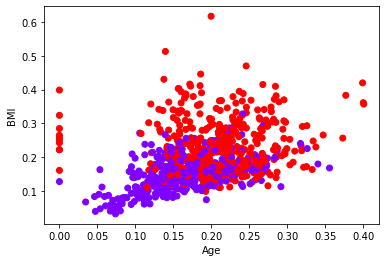

In [29]:
plt.scatter(Xn1[:,5],Xn1[:,7], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("Age")
plt.ylabel("BMI")




In [30]:
# ici , nous avons 2 clusters representés par les couleurs violettes et rouges. la variable étudié pour determiné pour determiner la susceptibilité de ce groupe c'est l'âge et le BMI. Moins on est agé ; moins aussi notre BMI est elevé , moins aussi on est exposé à attraper la maladie.

Text(0, 0.5, 'BMI')

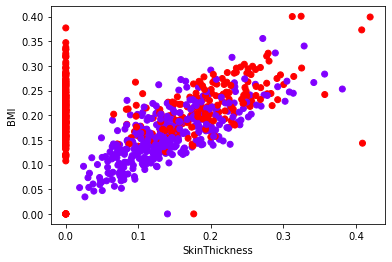

In [31]:
plt.scatter(Xn1[:,3],Xn1[:,5], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("SkinThickness")
plt.ylabel("BMI")

In [32]:
#ici l'algorithme nous montre deux groupes de cluster en fonction de l'âge et IMC  representés par les differentes couleurs rouges et violettes.

Text(0, 0.5, 'Glucose')

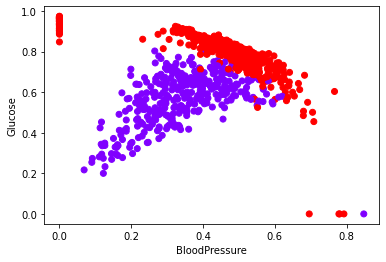

In [33]:
plt.scatter(Xn1[:,2],Xn1[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("BloodPressure")
plt.ylabel("Glucose")

In [34]:
# Ici nous avons 2 clusters ; mmais les variables sont la pression sanguine et le glucose.  Les patients ayant une pression sanguine et un taux de glucose elevés sont vulnerables à la maldie du diabète.

Text(0, 0.5, 'Insulin')

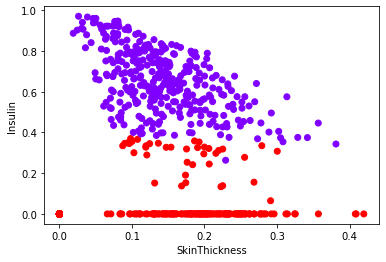

In [35]:
plt.scatter(Xn1[:,3],Xn1[:,4], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")

In [36]:
# Ici nous avons deux variables d'étude pour nos 2 clusters à savoir l'épaisseur de la peau et l'insuline. les groupes de personnes ayant une 

Text(0, 0.5, 'Age')

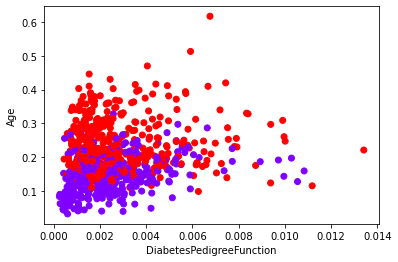

In [37]:
plt.scatter(Xn1[:,6],Xn1[:,7], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Age")

Text(0, 0.5, 'Glucose')

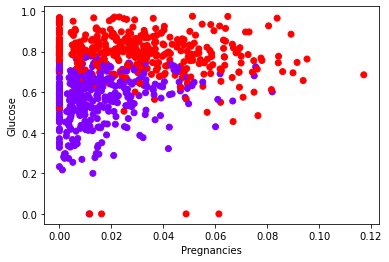

In [38]:
plt.scatter(Xn1[:,0],Xn1[:,1], c=k_mean2.labels_, cmap='rainbow')
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")

In [39]:
# Ici les variables utilisés ; sont le taux de glucose et le pregnancie. un taux de glucose elevé chez des personnes peut etre une source du diabète

Text(0, 0.5, 'BMI')

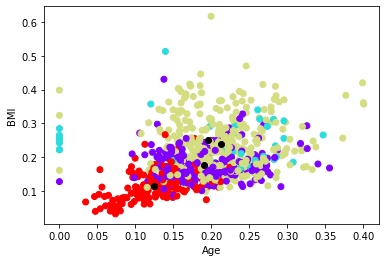

In [40]:
#Visualisons avec 4 clusters
plt.scatter(Xn1[:,5],Xn1[:,7], c=k_mean4.labels_, cmap='rainbow')
plt.scatter(clusters_4[:,5] ,clusters_4[:,7], color='black')
plt.xlabel("Age")
plt.ylabel("BMI")

In [41]:
# ce graphique nous montre 4 clusters ( groupes cibles ) qui a été selectioonnés en fontion de nos varibales qui sont l'äge et le BMI . Ces clusters s'identifient à ces differentes couleurs sur le graphe.